In [492]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os
import re

# Pose a prediction question that can be answered with data and a machine learning model:
    Can we predict the numnber of fatalities that will result from "major" or "great" earthquakes (earthquakes with 
    magnitude of at least 7) based on Magnitude, Latitude, Longitude, Month, and Hour?

# Collect data via webscraping:

Scrape data from Wikipedia's "significant earthquakes" lists over the past 120 years
- These lists contain earthquakes that are all:
    - Magnitude 6 or above (1900-2000), "unless they are notable for some other reason".
    - Magnitude 7 or above (2001-2020) or which caused fatalities.
    
In order to make the data more usable for purposes here, I will select all earthquakes from 1981 - 2020 that are magnitude 7 or above. This way, I can analyze all earthquakes that can be classified as "major" or "great" over the past 40 years.
    

In [493]:
url1 = "https://en.wikipedia.org/wiki/Lists_of_20th-century_earthquakes"
url2 = "https://en.wikipedia.org/wiki/List_of_earthquakes_2001%E2%80%932010"
url3 = "https://en.wikipedia.org/wiki/List_of_earthquakes_2011%E2%80%932020"

In [494]:
earthquakes_1 = pd.read_html(url1)
earthquakes_2 = pd.read_html(url2)
earthquakes_3 = pd.read_html(url3)


In [495]:
# Select only the tables from these lists that have 9 columns, since those are the ones we want:

new_earthquakes_1 = [table for table in earthquakes_1 if table.shape[1] ==9]
new_earthquakes_2 = [table for table in earthquakes_2 if table.shape[1] ==9]
new_earthquakes_3 = [table for table in earthquakes_3 if table.shape[1] ==9]
for table in range(len(new_earthquakes_1)):
    print(new_earthquakes_1[table].shape)
#for table in range(len(new_earthquakes_2)):
#    print(new_earthquakes_2[table].shape)
#for table in range(len(new_earthquakes_3)):
#    print(new_earthquakes_3[table].shape)

# Now, select only the last 2 tables from new_earthquakes_1 in order to get rid of data from years we don't want:
new_earthquakes_1 = [new_earthquakes_1[-2], new_earthquakes_1[-1]]

(26, 9)
(25, 9)
(29, 9)
(35, 9)
(36, 9)
(35, 9)
(42, 9)
(42, 9)
(40, 9)
(63, 9)


In [723]:
earthquakes_1_df = pd.concat(new_earthquakes_1)
earthquakes_2_df = pd.concat(new_earthquakes_2)
earthquakes_3_df = pd.concat(new_earthquakes_3)

In [724]:
earthquakes_1_df.head()

,Date,Time,Place,Lat.,Long.,Deaths,Magnitude,Comments,Sources
0,"January 19, 1981",15:11,"Irian Jaya, Indonesia see 1981 Irian Jaya eart...",−4.576,139.232,305.0,6.7,Ms,[86]
1,"January 23, 1981",21:13,"Sichuan, China see 1981 Dawu earthquake",30.93,101.10,150.0,6.8,ML,USGS
2,"October 25, 1981",03:22 UTC,"Playa Azul, Mexico see 1981 Playa Azul earthquake",18.05,-102.08,3.0,7.3,Ms,USGS
3,"December 13, 1982",09:12,"Dhamar, North Yemen (now Yemen) see 1982 North...",14.70,44.38,2800.0,6.2,Mw,USGS
4,"May 2, 1983",23:42,"Coalinga, California, United States see 1983 C...",36.23,−120.32,NaN,6.5,"Mw (Ellsworth, 1990)",USGS


In [725]:
earthquakes_2_df.head()

,Date,Time (UTC),Place,Lat.,Long.,Fatalities,Magnitude,Comments,Sources,Source
0,"January 1, 2001",06:57,"Mindanao, Philippines",6.898,126.579,0,7.5,Mw (HRV).,NaN,NaN
1,"January 9, 2001",16:49,Vanuatu,-14.928,167.170,0,7.1,Mw (USGS).,NaN,NaN
2,"January 10, 2001",16:02,"Kodiak Island region, Alaska, United States",57.078,-153.211,0,7.0,Mw (HRV).,NaN,NaN
3,"January 13, 2001",17:33,Offshore El Salvador see January 2001 El Salva...,13.049,-88.660,944,7.7,Mw (HRV).,NaN,NaN
4,"January 26, 2001",03:16,"Gujarat, India see 2001 Gujarat earthquake",23.419,70.232,20085,7.7,Mw (HRV).,NaN,NaN


In [726]:
earthquakes_3_df.head()

,Date,Time (UTC),Place,Lat.,Long.,Fatalities,Magnitude,Comments,Source
0,"January 1, 2011",09:56,"Santiago del Estero, Argentina",-26.794,-63.079,0,7.0,Mw (USGS) Centred 160 km NE of Santiago del Es...,[1]
1,"January 2, 2011",20:20,"Araucania, Chile see 2011 Temuco earthquake",-38.354,-73.275,0,7.1,"Mw (USGS) Centred 70 km NW of Temuco, Araucani...",[2]
2,"January 13, 2011",16:16,"Loyalty Islands, New Caledonia",-20.622,168.459,0,7.0,"Mw (USGS) Centred 120 km NNE of Tadine, Loyalt...",[3]
3,"January 18, 2011",20:23,Southwestern Pakistan see 2011 Dalbandin earth...,28.732,63.928,3,7.2,"Mw (USGS) Centred 50 km WSW of Dalbandin, Paki...",[4]
4,"February 4, 2011",13:53,Myanmar–India border region,24.618,94.680,1,6.2,"Mw (USGS) Centred 62.5 km east of Wangjing, In...",[5]


Now, select only the "Date", "Time (UTC)", "Lat.", "Long.", "Fatalities" (or "Deaths"), and "Magnitude" columns

In [727]:
earthquakes_1_df['Deaths'] = earthquakes_1_df['Deaths']
earthquakes_1df = earthquakes_1_df[['Date','Time','Lat.','Long.','Deaths','Magnitude']]
earthquakes_2df = earthquakes_2_df[['Date','Time (UTC)','Lat.','Long.','Fatalities','Magnitude']]
earthquakes_3df = earthquakes_3_df[['Date','Time (UTC)','Lat.','Long.','Fatalities','Magnitude']]

Rename earthquakes_1df "Deaths" column to "Fatalities" in order to be more consistent with column names of earthquakes_2df and earthquakes_3df

In [728]:
earthquakes_1df.columns = ['Date','Time (UTC)','Lat.','Long.','Fatalities','Magnitude']


We can now merge the three datasets together to create one big earthquake dataframe:

In [729]:
all_earthquakes = pd.concat([earthquakes_1df, earthquakes_2df, earthquakes_3df])
all_earthquakes.reset_index(inplace=True)

In [730]:
# Drop missing values (about 27 rows)

all_earthquakes = all_earthquakes.dropna()
all_earthquakes = all_earthquakes.drop(columns=['index'])
all_earthquakes.reset_index(inplace=True)
all_earthquakes.head()

,index,Date,Time (UTC),Lat.,Long.,Fatalities,Magnitude
0,0,"January 19, 1981",15:11,−4.576,139.232,305,6.7
1,1,"January 23, 1981",21:13,30.93,101.10,150,6.8
2,2,"October 25, 1981",03:22 UTC,18.05,-102.08,3,7.3
3,3,"December 13, 1982",09:12,14.70,44.38,2800,6.2
4,6,"October 28, 1983",14:06,44.09,−113.8,2,7


# Clean / wrangle the data, create features:

Create a "DateTime" column that combines "Date" and "Time (UTC)". Then create a "Month" column and an "Hour" column.

Next, clean up the fatalities column and include only deaths.

Then, clean up the latitude/longitude columns and convert them into "float" type.

Lastly, select only the earthquakes where Magnitude is at least 7.

In [731]:
time_col = all_earthquakes['Time (UTC)'].apply(lambda x: re.findall('\d{2}\W\d{2}', str(x)))
time_col = time_col.apply(lambda x: x[0])
time_col = time_col.apply(lambda x: re.sub('\.', ':', str(x)))

all_earthquakes['Time (UTC)'] = time_col

all_earthquakes['DateTime'] = pd.to_datetime(all_earthquakes['Date'] + ' ' + all_earthquakes['Time (UTC)'])

all_earthquakes['Month'] = all_earthquakes['DateTime'].apply(lambda x: x.month)
all_earthquakes['Hour'] = all_earthquakes['DateTime'].apply(lambda x: x.hour)

In [732]:
all_earthquakes.head()

,index,Date,Time (UTC),Lat.,Long.,Fatalities,Magnitude,DateTime,Month,Hour
0,0,"January 19, 1981",15:11,−4.576,139.232,305,6.7,1981-01-19 15:11:00,1,15
1,1,"January 23, 1981",21:13,30.93,101.10,150,6.8,1981-01-23 21:13:00,1,21
2,2,"October 25, 1981",03:22,18.05,-102.08,3,7.3,1981-10-25 03:22:00,10,3
3,3,"December 13, 1982",09:12,14.70,44.38,2800,6.2,1982-12-13 09:12:00,12,9
4,6,"October 28, 1983",14:06,44.09,−113.8,2,7,1983-10-28 14:06:00,10,14


In [733]:
fatalities_column = all_earthquakes['Fatalities'].apply(lambda x: re.sub(',', '', str(x)))
fatalities_column = fatalities_column.apply(lambda x: re.sub('\.0','', str(x)))
all_inj_and_dead = fatalities_column.apply(lambda x: re.findall('\d+', str(x)))
all_deaths = all_inj_and_dead.apply(lambda x: x[0])
all_earthquakes['Fatalities'] = pd.to_numeric(all_deaths)

# Now, the "Fatalities" column only includes deaths (in numeric format).

In [734]:
magnitudes = all_earthquakes['Magnitude'].apply(lambda x: re.findall('\d+\.*\d*', str(x)))
all_earthquakes['Magnitude'] = magnitudes.apply(lambda x: float(x[0]))

In [735]:
all_earthquakes.head(15)

,index,Date,Time (UTC),Lat.,Long.,Fatalities,Magnitude,DateTime,Month,Hour
0,0,"January 19, 1981",15:11,−4.576,139.232,305,6.7,1981-01-19 15:11:00,1,15
1,1,"January 23, 1981",21:13,30.93,101.10,150,6.8,1981-01-23 21:13:00,1,21
2,2,"October 25, 1981",03:22,18.05,-102.08,3,7.3,1981-10-25 03:22:00,10,3
3,3,"December 13, 1982",09:12,14.70,44.38,2800,6.2,1982-12-13 09:12:00,12,9
4,6,"October 28, 1983",14:06,44.09,−113.8,2,7.0,1983-10-28 14:06:00,10,14
5,7,"October 30, 1983",07:12,40.33,42.19,1342,6.9,1983-10-30 07:12:00,10,7
6,10,"December 22, 1983",04:11,-11.866,13.259,500,6.3,1983-12-22 04:11:00,12,4
7,13,"March 3, 1985",19:47,−33.24,−71.850,177,7.8,1985-03-03 19:47:00,3,19
8,14,"April 8, 1985",21:56,−34.04,−71.39,2,7.5,1985-04-08 21:56:00,4,21
9,15,"September 19, 1985",13:17,18.44,−102.36,10000,8.0,1985-09-19 13:17:00,9,13


In [736]:
# Clean up latitude / longitude columns, since there's a weird hyphen (not minus sign) and degree N/E symbols we don't want.
all_earthquakes['Lat.'] = all_earthquakes['Lat.'].apply(lambda x: re.sub('−','-', str(x)))
all_earthquakes['Lat.'] = all_earthquakes['Lat.'].apply(lambda x: re.sub('[^0-9.-]+', '', str(x)))

all_earthquakes['Long.'] = all_earthquakes['Long.'].apply(lambda x: re.sub('−','-', str(x)))
all_earthquakes['Long.'] = all_earthquakes['Long.'].apply(lambda x: re.sub('[^0-9.-]+', '', str(x)))

In [737]:
# Convert latitude / longitude to a float:

all_earthquakes['Lat.'] = all_earthquakes['Lat.'].apply(lambda x: float(x))
all_earthquakes['Long.'] = all_earthquakes['Long.'].apply(lambda x: float(x))


In [738]:
# Looks great!
all_earthquakes.head(15)

,index,Date,Time (UTC),Lat.,Long.,Fatalities,Magnitude,DateTime,Month,Hour
0,0,"January 19, 1981",15:11,-4.576,139.232,305,6.7,1981-01-19 15:11:00,1,15
1,1,"January 23, 1981",21:13,30.930,101.100,150,6.8,1981-01-23 21:13:00,1,21
2,2,"October 25, 1981",03:22,18.050,-102.080,3,7.3,1981-10-25 03:22:00,10,3
3,3,"December 13, 1982",09:12,14.700,44.380,2800,6.2,1982-12-13 09:12:00,12,9
4,6,"October 28, 1983",14:06,44.090,-113.800,2,7.0,1983-10-28 14:06:00,10,14
5,7,"October 30, 1983",07:12,40.330,42.190,1342,6.9,1983-10-30 07:12:00,10,7
6,10,"December 22, 1983",04:11,-11.866,13.259,500,6.3,1983-12-22 04:11:00,12,4
7,13,"March 3, 1985",19:47,-33.240,-71.850,177,7.8,1985-03-03 19:47:00,3,19
8,14,"April 8, 1985",21:56,-34.040,-71.390,2,7.5,1985-04-08 21:56:00,4,21
9,15,"September 19, 1985",13:17,18.440,-102.360,10000,8.0,1985-09-19 13:17:00,9,13


In [739]:
new_df = all_earthquakes.loc[all_earthquakes['Magnitude']>=7]

In [740]:
new_df = new_df.reset_index().drop(columns='index').drop(columns='level_0')
new_df.head(16)

,Date,Time (UTC),Lat.,Long.,Fatalities,Magnitude,DateTime,Month,Hour
0,"October 25, 1981",03:22,18.050,-102.080,3,7.3,1981-10-25 03:22:00,10,3
1,"October 28, 1983",14:06,44.090,-113.800,2,7.0,1983-10-28 14:06:00,10,14
2,"March 3, 1985",19:47,-33.240,-71.850,177,7.8,1985-03-03 19:47:00,3,19
3,"April 8, 1985",21:56,-34.040,-71.390,2,7.5,1985-04-08 21:56:00,4,21
4,"September 19, 1985",13:17,18.440,-102.360,10000,8.0,1985-09-19 13:17:00,9,13
5,"March 6, 1987",04:10,-0.000,77.700,5000,7.1,1987-03-06 04:10:00,3,4
6,"November 6, 1988",13:03,22.789,99.611,938,7.7,1988-11-06 13:03:00,11,13
7,"June 14, 1990",15:41,11.340,122.100,8,7.1,1990-06-14 15:41:00,6,15
8,"June 21, 1990",00:30,36.960,49.410,40000,7.4,1990-06-21 00:30:00,6,0
9,"July 16, 1990",16:26,15.700,121.200,1621,7.9,1990-07-16 16:26:00,7,16


In [741]:
# Remove observation 15 since it has a messed up Longitude coord:
new_df = new_df.drop(index=15)
new_df = new_df.reset_index()
new_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 331 entries, 0 to 330
Data columns (total 10 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   index       331 non-null    int64         
 1   Date        331 non-null    object        
 2   Time (UTC)  331 non-null    object        
 3   Lat.        331 non-null    float64       
 4   Long.       331 non-null    float64       
 5   Fatalities  331 non-null    int64         
 6   Magnitude   331 non-null    float64       
 7   DateTime    331 non-null    datetime64[ns]
 8   Month       331 non-null    int64         
 9   Hour        331 non-null    int64         
dtypes: datetime64[ns](1), float64(3), int64(4), object(2)
memory usage: 26.0+ KB


# Exploratory Data Analysis:

Text(0.5, 1.0, '(Magnitude 7+, from 1981 - 2020)')

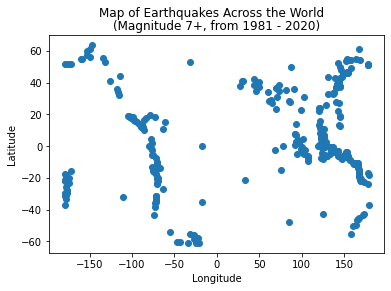

In [781]:
longitude_coords = new_df['Long.']
latitude_coords = new_df['Lat.']
Magnitude = new_df['Magnitude']
plt.scatter(longitude_coords, latitude_coords)
plt.xlabel("Longitude")
plt.ylabel("Latitude")
plt.suptitle("Map of Earthquakes Across the World")
plt.title("(Magnitude 7+, from 1981 - 2020)")

"Major" and "Great" earthquakes appear to occur the most in Asia.

Text(0.5, 1.0, '(For Earthquakes of Magnitude 7+, from 1981 - 2020)')

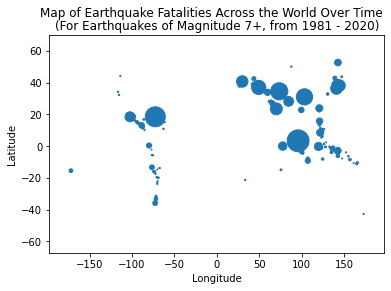

In [782]:
longitude_coords = new_df['Long.']
latitude_coords = new_df['Lat.']
Fatalities = new_df['Fatalities']
plt.scatter(longitude_coords, latitude_coords, s=np.sqrt(Fatalities))
plt.xlabel("Longitude")
plt.ylabel("Latitude")
plt.suptitle("Map of Earthquake Fatalities Across the World Over Time")
plt.title("(For Earthquakes of Magnitude 7+, from 1981 - 2020)")

From the map above, it seems that most fatalities are caused by "major" and "great" earthquakes in Asia, which makes sense because Asia is also where most of these earthquakes occur.

Text(0.5, 1.0, '(Magnitude 7+, from 1981 - 2020)')

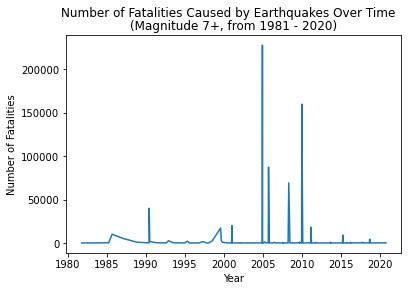

In [784]:
plt.plot(new_df['DateTime'], new_df['Fatalities'])
plt.xlabel("Year")
plt.ylabel("Number of Fatalities")
plt.suptitle("Number of Fatalities Caused by Earthquakes Over Time")
plt.title("(Magnitude 7+, from 1981 - 2020)")

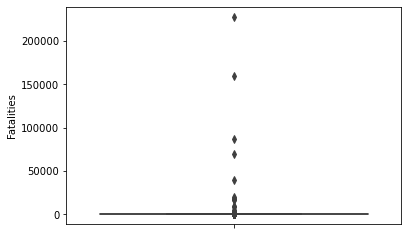

In [792]:
sns.boxplot(y=new_df['Fatalities'])



Above, it appears that the vast majority of earthquakes don't cause many fatalities, with a few outliers.

Below, we see that most earthquakes in this dataset are between 7 and 8.25 magnitude, with a few above 8.25.

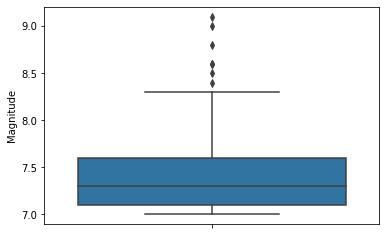

In [807]:
sns.boxplot(y=new_df['Magnitude'])

In [933]:
new_df.tail(50)

,index,Date,Time (UTC),Lat.,Long.,Fatalities,Magnitude,DateTime,Month,Hour
281,282,"August 29, 2016",04:29,-0.041,-17.826,0,7.1,2016-08-29 04:29:00,8,4
282,283,"September 1, 2016",16:37,-37.359,179.146,0,7.0,2016-09-01 16:37:00,9,16
283,284,"November 13, 2016",11:02,-42.757,173.077,2,7.8,2016-11-13 11:02:00,11,11
284,285,"November 24, 2016",18:43,11.960,-88.836,1,7.0,2016-11-24 18:43:00,11,18
285,286,"December 8, 2016",17:38,-10.676,161.330,1,7.8,2016-12-08 17:38:00,12,17
286,287,"December 17, 2016",10:51,-4.509,153.450,0,7.9,2016-12-17 10:51:00,12,10
287,288,"December 25, 2016",14:22,-43.416,-73.880,0,7.6,2016-12-25 14:22:00,12,14
288,289,"January 10, 2017",06:13,4.463,122.575,0,7.3,2017-01-10 06:13:00,1,6
289,290,"January 22, 2017",04:30,-6.214,155.122,3,7.9,2017-01-22 04:30:00,1,4
290,291,"July 17, 2017",23:34,54.466,168.822,0,7.7,2017-07-17 23:34:00,7,23


 # Analyze the data with multiple machine learning approaches and evaluate each model:

In [1066]:
from sklearn.linear_model import LinearRegression, LassoCV
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score
from sklearn.svm import SVR
from sklearn.ensemble import RandomForestClassifier

Create train and test datasets in order to be able to evaluate model performance

In [1055]:
# Create X using the explanatory variables we wish to include in the models:
X = new_df[['Lat.', 'Long.', 'Magnitude', 'Month', 'Hour']]
y = new_df['Fatalities']

In [1056]:
Xtrain, Xtest, ytrain, ytest = train_test_split(X, y, test_size=0.20, random_state=5)

In [1057]:
#X = all_earthquakes[['Lat.', 'Long.', 'Magnitude', 'Month', 'Hour']]
#y = all_earthquakes['Fatalities']

#Xtrain, Xtest, ytrain, ytest = train_test_split(X, y, test_size=0.20, random_state=5)

Now, fit and test the models.

In [1058]:
lm = LinearRegression()
scaler = StandardScaler()

Xtrain_scaled = scaler.fit_transform(Xtrain)
Xtest_scaled = scaler.fit_transform(Xtest)

lm.fit(Xtrain_scaled, ytrain)


yhat_lm = lm.predict(Xtest_scaled)
lm_mse = mean_squared_error(yhat_lm, ytest)
print(np.sqrt(lm_mse))

lm_r2 = r2_score(ytest, yhat_lm)
lm_r2


5137.3807705780655


-1.7006249833214282

In [1060]:
dt = DecisionTreeRegressor(min_samples_leaf=3)

dt.fit(Xtrain_scaled, ytrain)

yhat_dt = dt.predict(Xtest_scaled)
dt_mse = mean_squared_error(yhat_dt, ytest)
print(np.sqrt(dt_mse))

yhat_dt

5414.4026522282265


array([1.75000000e+00, 5.70900000e+03, 6.08000000e+01, 1.66666667e+00,
       1.90000000e+01, 0.00000000e+00, 1.01666667e+02, 7.09333333e+02,
       1.90000000e+01, 1.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 4.68000000e+01, 0.00000000e+00, 1.04450000e+03,
       1.41333333e+02, 3.33333333e-01, 0.00000000e+00, 0.00000000e+00,
       1.80000000e+03, 0.00000000e+00, 1.66666667e+00, 2.50400000e+02,
       0.00000000e+00, 1.40000000e+00, 1.41333333e+02, 0.00000000e+00,
       2.66666667e+00, 2.50400000e+02, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 5.13333333e+01, 5.74365000e+04, 0.00000000e+00,
       0.00000000e+00, 2.66666667e+00, 1.00000000e+00, 5.70900000e+03,
       1.01666667e+02, 0.00000000e+00, 0.00000000e+00, 3.80000000e+01,
       0.00000000e+00, 9.04666667e+02, 0.00000000e+00, 1.04450000e+03,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 1.66666667e+02,
       6.08000000e+01, 1.41333333e+02, 0.00000000e+00, 8.55000000e+02,
      

In [1062]:
knn = KNeighborsRegressor(n_neighbors=10)

knn.fit(Xtrain_scaled, ytrain)

yhat_knn = knn.predict(Xtest_scaled)
knn_mse = mean_squared_error(yhat_knn, ytest)
print(np.sqrt(knn_mse))

yhat_knn


5624.01105239514


array([2.14000e+02, 5.87010e+03, 3.56740e+03, 5.08100e+02, 4.29000e+01,
       4.48000e+01, 1.64800e+02, 2.55800e+02, 1.94000e+02, 5.50000e+00,
       1.40000e+00, 0.00000e+00, 4.00000e+00, 9.52000e+01, 0.00000e+00,
       9.91110e+03, 9.46670e+03, 5.00200e+02, 6.06400e+02, 1.16100e+02,
       5.04300e+02, 4.58000e+01, 4.29000e+01, 7.32000e+01, 1.00000e-01,
       1.60018e+04, 1.55200e+02, 2.05900e+02, 3.84730e+03, 2.30000e+01,
       1.89000e+01, 1.00000e-01, 2.40877e+04, 3.32000e+01, 3.16745e+04,
       1.00000e-01, 4.00000e-01, 4.80000e+00, 1.70000e+00, 7.00000e-01,
       1.45900e+02, 2.29500e+02, 5.00000e-01, 2.54000e+02, 3.80000e+00,
       3.00870e+03, 1.79000e+01, 3.99200e+02, 1.00000e-01, 4.28000e+01,
       1.16100e+02, 3.04500e+02, 1.58100e+02, 4.58600e+02, 4.56000e+01,
       1.69000e+02, 2.41500e+02, 3.16000e+01, 1.96400e+02, 6.78700e+02,
       2.23091e+04, 3.90000e+00, 1.08400e+02, 2.09900e+02, 1.00000e-01,
       1.99000e+01, 1.89800e+02])

In [1063]:
svm = SVR()

svm.fit(Xtrain_scaled, ytrain)

yhat_svm = svm.predict(Xtest_scaled)
svm_mse = mean_squared_error(yhat_svm, ytest)
print(np.sqrt(svm_mse))

yhat_svm

3188.887940773417


array([ 1.69479586,  0.53811357,  1.30346481,  0.33394679,  1.8241335 ,
        0.29008079,  3.97191454,  1.60631565,  1.73259356,  0.31622272,
       -0.03868467,  0.18506358, -0.42286906,  1.44091493,  1.1818857 ,
        3.0570544 ,  3.51727319,  0.4016963 ,  2.75458951,  1.19329795,
        0.40205457,  0.55540562,  0.39583046,  0.43943769, -0.28779068,
        0.78932199,  0.24921017,  0.22537151,  2.81529941,  2.1698418 ,
        1.20419209, -0.03993778,  1.59563206,  1.15311729,  2.46310541,
        0.01391759,  0.36837438,  1.03316564,  0.34718103, -0.12195361,
        2.53484344,  0.12920415,  0.16591733,  1.0386502 ,  0.15249589,
        1.31598031,  0.73968394,  0.73865495,  0.05229883,  1.56749173,
        1.87863872,  0.06488556,  1.3240747 ,  1.78694909,  0.66375922,
        1.62999574,  1.05005719,  0.12149938,  1.19568813,  0.60953072,
        1.90246246,  0.13042189,  0.72891111,  0.30086866, -0.18305641,
        0.47374636,  1.39318527])

In [1033]:
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import confusion_matrix, f1_score, precision_score, recall_score, roc_auc_score, roc_curve, accuracy_score

In [1025]:
new_df2 = all_earthquakes[['Lat.', 'Long.', 'Fatalities', 'Magnitude', 'Month', 'Hour']]
new_df2['Fatalities_bool'] = new_df2['Fatalities']>0

<ipython-input-1025-30b53a95dbeb>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_df2['Fatalities_bool'] = new_df2['Fatalities']>0


In [1052]:
train, test = train_test_split(new_df2, test_size=0.20, random_state=5)

y_train = (train['Fatalities']>0).astype(int)
y_test = (test['Fatalities']>0).astype(int)
X_train = train[['Lat.', 'Long.', 'Magnitude', 'Month', 'Hour']]
X_test = test[['Lat.', 'Long.', 'Magnitude', 'Month', 'Hour']]


[[37  2]
 [31 85]]
0.7870967741935484
0.8374384236453203
0.9770114942528736
0.7327586206896551


0.9038461538461539

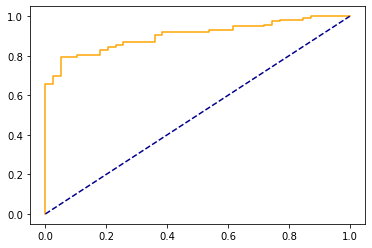

In [1049]:
nb = GaussianNB()

nb.fit(X_train, y_train)

nb_preds = nb.predict(X_test)

y_test

print(confusion_matrix(y_test, nb_preds))

print(accuracy_score(y_test, nb_preds))
print(f1_score(y_test, nb_preds))
print(precision_score(y_test, nb_preds))
print(recall_score(y_test, nb_preds))

y_prob = nb.predict_proba(X_test)[:,1]
fpr, tpr, thresh = roc_curve(y_test, y_prob)
plt.plot(fpr, tpr, color='orange', label='ROC')
plt.plot([0, 1], [0, 1], color='darkblue', linestyle='--')
roc_auc_score(y_test, y_prob)

In [1029]:
new_df2.Fatalities_bool.value_counts()

# 576 of the earthquakes had fatalities, 196 of the earthquakes had no fatalities.

True     576
False    196
Name: Fatalities_bool, dtype: int64

[[ 26  13]
 [  9 107]]
0.8580645161290322
0.9067796610169492
0.8916666666666667
0.9224137931034483


0.9524756852343059

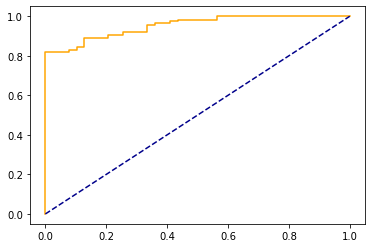

In [1078]:
gbc = GradientBoostingClassifier()

gbc.fit(X_train, y_train)

gbc_preds = gbc.predict(X_test)

y_test

print(confusion_matrix(y_test, gbc_preds))

print(accuracy_score(y_test, gbc_preds))
print(f1_score(y_test, gbc_preds))
print(precision_score(y_test, gbc_preds))
print(recall_score(y_test, gbc_preds))

y_prob = gbc.predict_proba(X_test)[:,1]
fpr, tpr, thresh = roc_curve(y_test, y_prob)
plt.plot(fpr, tpr, color='orange', label='ROC')
plt.plot([0, 1], [0, 1], color='darkblue', linestyle='--')

roc_auc_score(y_test, y_prob)

[[ 31   8]
 [  7 109]]
0.9032258064516129
0.9356223175965666
0.9316239316239316
0.9396551724137931


0.9615384615384616

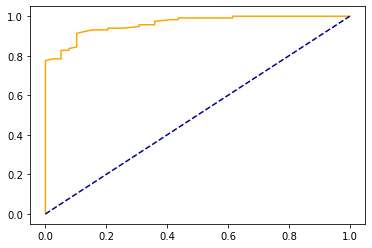

In [1080]:
rfc = RandomForestClassifier(n_estimators=100, n_jobs=4)

rfc.fit(X_train, y_train)

rfc_preds = rfc.predict(X_test)

y_test

print(confusion_matrix(y_test, rfc_preds))

print(accuracy_score(y_test, rfc_preds))
print(f1_score(y_test, rfc_preds))
print(precision_score(y_test, rfc_preds))
print(recall_score(y_test, rfc_preds))

y_prob = rfc.predict_proba(X_test)[:,1]
fpr, tpr, thresh = roc_curve(y_test, y_prob)
plt.plot(fpr, tpr, color='orange', label='ROC')
plt.plot([0, 1], [0, 1], color='darkblue', linestyle='--')

roc_auc_score(y_test, y_prob)

The regression models predicting number of fatalities caused by an earthquake struggle with estimation for a variety of reasons. For one, many of the earthquakes caused no or very few fatalities. Then, there are a handfull that caused a large number of fatalities. This made the regression problem difficult due to the huge imbalance in number of fatalities across earthquakes.

The classification models are likely a much better machine learning approach to the problem. Instead of predicting number of earthquakes with this limited data, we can more accurately predict whether or not an earthquake will cause any fatalities. It appears that the Random Forest Classifier model performed the best for this situation.